## Purpose and Questions in EDA

> "Doing data analysis requires quite a bit of thinking and we believe that when you’ve completed a good data analysis, you’ve spent more time thinking than doing." - Roger Peng

> "I wouldn't say that knowing your data is the most difficult thing in data science, but it is time-consuming. Therefore, it's easy to overlook this initial step and jump too soon into the water."

1. **Descriptive** - "seeks to summarize a characteristic of a set of data"
2. **Exploratory** - "analyze the data to see if there are patterns, trends, or relationships between variables" (hypothesis generating) 
3. **Inferential** - "a restatement of this proposed hypothesis as a question and would be answered by analyzing a different set of data" (hypothesis testing)
4. **Predictive** - "determine the impact on one factor based on other factor in a population - to make a prediction"
5. **Causal** - "asks whether changing one factor will change another factor in a population - to establish a causal link" 
6. **Mechanistic** - "establish *how* the change in one factor results in change in another factor in a population - to determine the exact mechanism"

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline 
import math
import statsmodels.formula.api as smf
from statsmodels.graphics.gofplots import qqplot
from scipy import stats

In [2]:
housing_data = pd.read_csv('../data/housing_price.csv')

In [3]:
housing_data.shape

(1460, 81)

### Data Snooping Bias
  * Before we decide on what algorithm to use on the data set, we have understand a lot about the data. If we look at whole dataset, we might stuble upon some seemingly interesting patterns in data that leads you to select a particular kind of Machine Learning Algorithm. This kind of approach **may fail** as the ML model may not be able generalize well on unseen datasets. 
      * The concept of understanding whole data (with out keeping testset aside) is know as Data Snooping.
      * The concept of unable to generalize well on unseen datasets **due to Data Snooping** is know as Data Snooping Bias.
  * <p>To avoid this "Data Snooping Bias", we have to split dataset into TRAIN, TEST. Do exploratory data analysis, train ML algorithm on TRAIN set, test the model on unseen TEST dataset. (kind of simulating production data)</p>

### Stratified Sampling 

In [4]:
from sklearn.model_selection import StratifiedShuffleSplit
split = StratifiedShuffleSplit(n_splits=1, test_size = 0.2, random_state=42)
for train_index, test_index in split.split(housing_data, housing_data['MSSubClass']):
    housing_train_set = housing_data.loc[train_index]
    housing_test_set = housing_data.loc[test_index]

In [5]:
housing_test_set.shape

(292, 81)

### Random Sampling

In [6]:
# 80% of housing_data.shape[0] = 1168
max_index = housing_data.shape[0] - 1
numbers = max_index*80//100
train_indexs = np.linspace(start=0, stop=max_index, num=numbers, dtype=int)
type(train_indexs)

numpy.ndarray

In [7]:
test_indexs = [x for x in range(max_index) if x not in train_indexs]
print(len(test_indexs))

293


In [8]:
housing_train_set = housing_data.loc[train_indexs]
housing_test_set = housing_data.loc[test_indexs]

In [9]:
housing_train_set.shape

(1167, 81)

In [10]:
housing_train_set.columns

Index(['Id', 'MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street',
       'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig',
       'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType',
       'HouseStyle', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd',
       'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType',
       'MasVnrArea', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual',
       'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1',
       'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating',
       'HeatingQC', 'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual',
       'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType',
       'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual',
       'GarageCond', 'PavedDrive

In [11]:
#housing_data[housing_data.GarageYrBlt.notnull()]
housing_train_set.rename(columns={'1stFlrSF':'FstFlrSF', '2ndFlrSF':'SecndFlrSF', '3SsnPorch':'ThreeSsnPorch'}, inplace=True)

###  As part of data analysis we refine the data - below are some common activities we do.

- **Missing : ** Check for missing or incomplete data, impute/fillna with appropriate data
- **Quality : ** Check for duplicates, accuracy, unusual data.
- **Parse : ** Prase existing data and create new fearures. e.g. Extract year and month from date
- **Convert : ** Free text to coded value (LabelEncoder, One-Hot-Encoding or LabelBinarizer)
- **Derive** Derive new feature out of existing featre/fearues e.g. gender from title Mr. Mrs.
- **Calculate** percentages, proportion
- **Remove** Remove redundant or not so useful data
- **Merge** Merge multiple columns e.g. first and surname for full name
- **Aggregate** e.g. rollup by year, cluster by area
- **Filter** e.g. exclude based on location
- **Sample** e.g. extract a representative data
- **Summary** Pandas describe function or stats like mean

** Missing data :** By “missing” data we simply mean null or “not present for whatever reason”. Lets see if we can find the missing data in our data set either because it exists and was not collected or it never existed

In [12]:
housing_train_set.count()

Id               1167
MSSubClass       1167
MSZoning         1167
LotFrontage       952
LotArea          1167
Street           1167
Alley              74
LotShape         1167
LandContour      1167
Utilities        1167
LotConfig        1167
LandSlope        1167
Neighborhood     1167
Condition1       1167
Condition2       1167
BldgType         1167
HouseStyle       1167
OverallQual      1167
OverallCond      1167
YearBuilt        1167
YearRemodAdd     1167
RoofStyle        1167
RoofMatl         1167
Exterior1st      1167
Exterior2nd      1167
MasVnrType       1161
MasVnrArea       1161
ExterQual        1167
ExterCond        1167
Foundation       1167
                 ... 
BedroomAbvGr     1167
KitchenAbvGr     1167
KitchenQual      1167
TotRmsAbvGrd     1167
Functional       1167
Fireplaces       1167
FireplaceQu       624
GarageType       1099
GarageYrBlt      1099
GarageFinish     1099
GarageCars       1167
GarageArea       1167
GarageQual       1099
GarageCond       1099
PavedDrive

In [13]:
housing_train_set.describe()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,ThreeSsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1167.000000,1167.000000,952.000000,1167.000000,1167.000000,1167.000000,1167.000000,1167.000000,1161.000000,1167.000000,...,1167.000000,1167.000000,1167.000000,1167.000000,1167.000000,1167.000000,1167.000000,1167.000000,1167.000000,1167.000000
mean,730.000857,57.283633,70.393908,10623.948586,6.127678,5.585261,1971.371894,1985.310197,106.795866,450.654670,...,94.000857,48.946872,21.394173,3.428449,16.934019,2.958012,50.594687,6.366752,2007.830334,182825.841474
std,421.706438,42.408100,25.265765,9208.434346,1.384172,1.118711,30.333800,20.443910,185.696403,470.609181,...,125.355019,69.336952,61.039794,30.175953,59.351266,41.666269,552.451967,2.700141,1.329958,81977.102916
min,1.000000,20.000000,21.000000,1477.000000,1.000000,1.000000,1875.000000,1950.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,365.500000,20.000000,59.000000,7597.500000,5.000000,5.000000,1954.000000,1968.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,131000.000000
50%,730.000000,50.000000,70.000000,9571.000000,6.000000,5.000000,1973.000000,1994.000000,0.000000,387.000000,...,0.000000,27.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,164990.000000
75%,1094.500000,70.000000,80.000000,11765.500000,7.000000,6.000000,2001.000000,2004.000000,170.000000,715.000000,...,168.000000,70.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,215000.000000
max,1460.000000,190.000000,313.000000,164660.000000,10.000000,9.000000,2009.000000,2010.000000,1600.000000,5644.000000,...,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,12.000000,2010.000000,755000.000000


In [14]:
housing_train_set.count()['PoolQC']

6

In [15]:
def getMissingDataFeatures(df):
    ser_counts = df.count()
    data_size = len(df)
    data_missing_features = []
    for idx in ser_counts.index:
        if(ser_counts[idx] < data_size):
            data_missing_features.append(idx)
    return data_missing_features

In [16]:
# place all these features in excel and get discriptions, see if any of them are useful in predecting house price
print(getMissingDataFeatures(housing_train_set))

['LotFrontage', 'Alley', 'MasVnrType', 'MasVnrArea', 'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2', 'FireplaceQu', 'GarageType', 'GarageYrBlt', 'GarageFinish', 'GarageQual', 'GarageCond', 'PoolQC', 'Fence', 'MiscFeature']


How can we handle these missing value?
        * Drop these rows / columns? Use .dropna(how='any')
        * Fill with a dummy value? Use .fillna(value=dummy)
        * Impute the cell with the most recent value? Use .fillna(method='ffill')
        * Interpolate the amount in a linear fashion? Use .interpolate() 
        * model based imputation

In [17]:
# dropna(axis=1, how='all') - Drop the columns where all elements are nan
# dropna(axis=1, how='any') - Drop the columns where any of the elements is nan
housing_train_set.dropna(axis=1, how='any').head()

,Id,MSSubClass,MSZoning,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,...,EnclosedPorch,ThreeSsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,8450,Pave,Reg,Lvl,AllPub,Inside,Gtl,...,0,0,0,0,0,2,2008,WD,Normal,208500
1,2,20,RL,9600,Pave,Reg,Lvl,AllPub,FR2,Gtl,...,0,0,0,0,0,5,2007,WD,Normal,181500
2,3,60,RL,11250,Pave,IR1,Lvl,AllPub,Inside,Gtl,...,0,0,0,0,0,9,2008,WD,Normal,223500
3,4,70,RL,9550,Pave,IR1,Lvl,AllPub,Corner,Gtl,...,272,0,0,0,0,2,2006,WD,Abnorml,140000
5,6,50,RL,14115,Pave,IR1,Lvl,AllPub,Inside,Gtl,...,0,320,0,0,700,10,2009,WD,Normal,143000


In [18]:
housing_train_set[['LotFrontage', 'Alley', 'MasVnrType', 'MasVnrArea', 'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2', 'Electrical', 'FireplaceQu', 'GarageType', 'GarageYrBlt', 'GarageFinish', 'GarageQual', 'GarageCond', 'PoolQC', 'Fence', 'MiscFeature']].dtypes

LotFrontage     float64
Alley            object
MasVnrType       object
MasVnrArea      float64
BsmtQual         object
BsmtCond         object
BsmtExposure     object
BsmtFinType1     object
BsmtFinType2     object
Electrical       object
FireplaceQu      object
GarageType       object
GarageYrBlt     float64
GarageFinish     object
GarageQual       object
GarageCond       object
PoolQC           object
Fence            object
MiscFeature      object
dtype: object

#### Handling missing values in a numeric feature
    * Look at the distribution of the data.
        * We can fill all numeric features with mean value. This is not right, we have to do some analysis before imputing/fillna. Below are two of them.
        * If data is normally distributed we impute/fillna with mean.
        * If data is partially normal distributed, there are outliers. Then go with median/mode. 

In [19]:
# fill mean for the numeric features.
housing_train_set.fillna(value=housing_train_set.mean()[['LotFrontage','MasVnrArea', 'GarageYrBlt']]).head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
5,6,50,RL,85.0,14115,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,MnPrv,Shed,700,10,2009,WD,Normal,143000


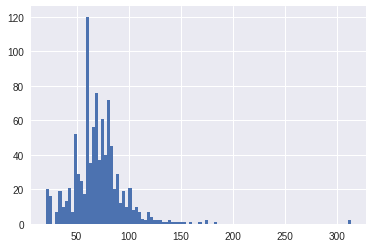

In [20]:
housing_train_set['LotFrontage'].hist(bins=100)

In [21]:
# Data is close to normal, around 350 items are close to 75, the mean is 70. Hence we can fillna with mean.
housing_train_set['LotFrontage'].mean()

70.393907563025209

In [22]:
housing_train_set.fillna(value=housing_train_set.mean()[['LotFrontage']], inplace=True).head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
5,6,50,RL,85.0,14115,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,MnPrv,Shed,700,10,2009,WD,Normal,143000


In [23]:
housing_train_set[housing_train_set.LotFrontage.isnull()]

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice


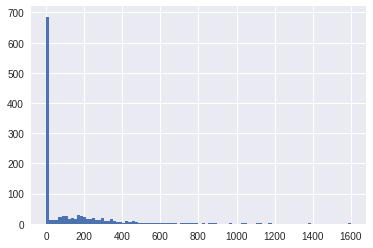

In [24]:
housing_train_set['MasVnrArea'].hist(bins=100)

In [25]:
# most of the data is at zero, I think it is appropriate fillna with zero. Means there is no masonry(stone work) veneer area in square feet
housing_train_set['MasVnrArea'].fillna(value=0, inplace=True)

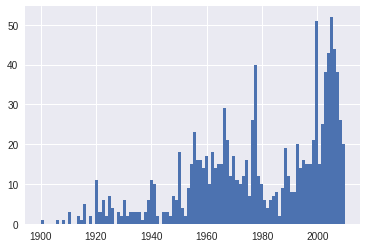

In [26]:
# GarageYrBlt - Year garage was built
housing_train_set['GarageYrBlt'].hist(bins=100)

In [27]:
# The distribution is not normal, hence I will try interpolation. pandas DataFrame uses index, feature as two variables. 
# We can change index if we think a feature is influencing the feature we have impute/fillna.
interpol_dumb = housing_train_set['GarageYrBlt'].interpolate(method='nearest')

### Finding a co-related feature with 'GarageYrBlt'

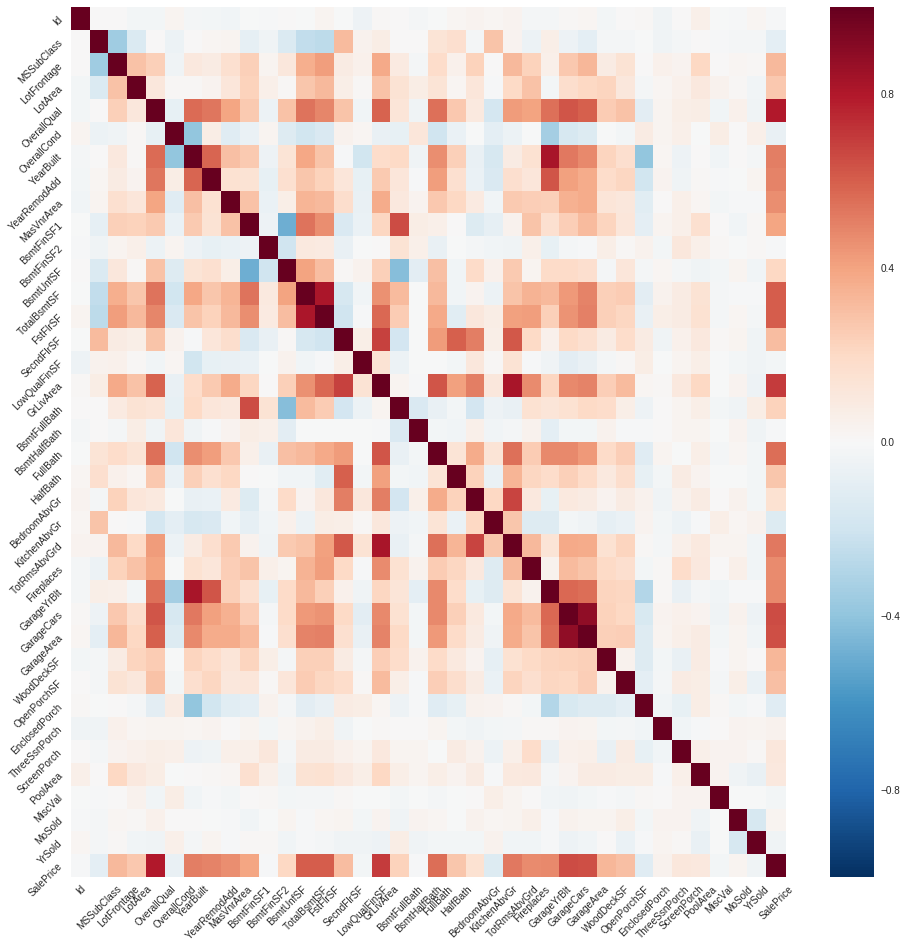

In [28]:
plt.figure(figsize=(16, 16))
g = sns.heatmap(housing_train_set.corr())
lst1 = g.set_yticklabels(g.get_yticklabels(), rotation = 45)
lst2 = g.set_xticklabels(g.get_xticklabels(), rotation = 45)

### Alternative Way of finding a co-related feature with 'GarageYrBlt' (Optional)

In [29]:
def getNumericalNonNullFeatureNames(df, feature):
    ser_dtypes = df.dtypes
    #Feature names which have numeric data and have no nulls.
    num_col_idx = [x for x in ser_dtypes.index 
                       if ser_dtypes[x] in ['int64','float64']
                                        and x not in [feature]
                                        and df[x].shape[0] == len(df)]
    return num_col_idx

# Above way is not appropriate as there will not be any correlation between Index and Feature. \
# We will try to a best correlated column for 'GarageYrBlt'. Then make it the index and then do interpolation.
def buildLinearModel_ExtractPvalues(df, feature):
    p_val_dict = dict()
    #Create a Data Frame whose rows have non-null values for feature.
    filtered_df = df[df[feature].notnull()]
    ser_dtypes = df.dtypes
    #Feature names which have numeric data and have no nulls.
    num_col_idx = getNumericalNonNullFeatureNames(df, feature)
    for col in num_col_idx:
        lm = smf.ols(formula=feature +'~' + col, data=filtered_df).fit()
        p_val_dict[col] = lm.pvalues[col]
    return p_val_dict

In [30]:
p_val_dict = buildLinearModel_ExtractPvalues(housing_train_set, 'GarageYrBlt')
sorted(p_val_dict.items(), key=lambda x: x[1])

[('YearBuilt', 9.1415241784190885e-273),
 ('YearRemodAdd', 6.9366948344636451e-124),
 ('GarageCars', 4.7774469865573956e-96),
 ('GarageArea', 9.4666404316982682e-92),
 ('OverallQual', 4.1124686969292953e-88),
 ('SalePrice', 5.7663396943472507e-65),
 ('FullBath', 8.3598529003502568e-65),
 ('OverallCond', 2.0047499079599371e-31),
 ('TotalBsmtSF', 1.1408537924373859e-28),
 ('EnclosedPorch', 2.0566702808309627e-23),
 ('FstFlrSF', 1.4229263576583085e-15),
 ('MasVnrArea', 1.909020429988735e-15),
 ('WoodDeckSF', 1.3816516339096726e-13),
 ('GrLivArea', 4.8859179519453732e-13),
 ('OpenPorchSF', 6.195427455164365e-13),
 ('BsmtUnfSF', 2.0204269133871409e-10),
 ('HalfBath', 1.0421985692092029e-09),
 ('BsmtFinSF1', 1.4064897008168294e-07),
 ('TotRmsAbvGrd', 6.5926794018991065e-06),
 ('BsmtFullBath', 1.1546473147401231e-05),
 ('KitchenAbvGr', 2.870076851572981e-05),
 ('BsmtHalfBath', 0.001654581928123318),
 ('BsmtFinSF2', 0.0064432306901817983),
 ('BedroomAbvGr', 0.0078796727852981831),
 ('ScreenPor

In [31]:
housing_train_set.index = housing_train_set.YearBuilt

In [32]:
housing_train_set.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
YearBuilt,,,,,,,,,,,,,,,,,,,,,
2003,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1976,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2001,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
1915,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
1993,6,50,RL,85.0,14115,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,MnPrv,Shed,700,10,2009,WD,Normal,143000


In [33]:
interpol_lm = housing_train_set['GarageYrBlt'].interpolate(method='nearest')

In [34]:
interpol_lm.head()

YearBuilt
2003    2003.0
1976    1976.0
2001    2001.0
1915    1998.0
1993    1993.0
Name: GarageYrBlt, dtype: float64

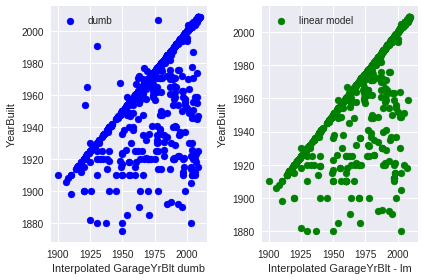

In [35]:
plt.subplot(1,2,1)
# 1,2,1 - one row, tow columns, the first plot
plt.scatter(interpol_dumb, housing_train_set.YearBuilt, c='blue', label='dumb')
plt.xlabel('Interpolated GarageYrBlt dumb')
plt.ylabel('YearBuilt')
plt.legend()

plt.subplot(1,2,2)
# 1,2,2 - one row, tow columns, the second plot
plt.scatter(interpol_lm, housing_train_set.YearBuilt, c='green', label='linear model')
plt.xlabel('Interpolated GarageYrBlt - lm')
plt.ylabel('YearBuilt')
plt.legend()

plt.tight_layout()

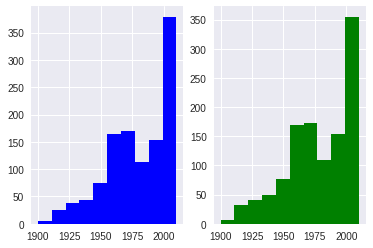

In [36]:
plt.subplot(1,2,1)
interpol_dumb.hist(color='blue')

plt.subplot(1,2,2)
interpol_lm.hist(color='green')

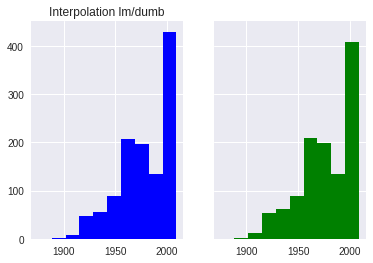

In [37]:
np.seterr(divide='ignore', invalid='ignore')

f, (ax1, ax2) = plt.subplots(1, 2, sharey=True)

graph_min = interpol_lm.index.min()
graph_max = interpol_lm.index.max()

ax1.hist(interpol_dumb, range=(graph_min, graph_max), bins=10, color='blue')
ax1.set_title('Interpolation lm/dumb')

ax2.hist(interpol_lm, range=(graph_min, graph_max), bins=10, color='green')

f.subplots_adjust(hspace=0.3)
plt.show()

In [38]:
housing_train_set.reset_index(drop=True, inplace=True)

In [39]:
housing_train_set.index

RangeIndex(start=0, stop=1167, step=1)

#### Handliing missing values in categorical features


* Ignore observations of missing values if we are dealing with large data sets and very few records have missing values. (unlikely approach)
* Ignore variable, if it is not significant.(unlikely approach)
* Treat missing data as just another category.
* **Replace with most frequent value.** (for now we will go with this apprach)
* Model based imputation: Build a model to predict missing values.

In [40]:
def getNullPercentage(df, feature):
    null_count = len(df[df[feature].isnull()])
    percent_of_nulls = null_count*100/len(df)
    return null_count, percent_of_nulls

def isFeatureDropable(df, lst_featrues, threshold=75):
    sample_size = len(df)
    dict_drop_feat = dict()
    for feature in lst_featrues:
        null_count, percent_of_nulls = getNullPercentage(df, feature)
        print('Null count in {0} : {1}, Percent of Null: {2}'.format(feature, null_count, percent_of_nulls))
        if(percent_of_nulls > threshold):
            print('Drop --- {}'.format(feature))
            dict_drop_feat[feature] = True
        else:
            dict_drop_feat[feature] = False
    return dict_drop_feat
                
#print('Total Data size {0}'.format(sample_size))
#print('Missing data in Alley Feature {0}'.format(feature_missing_data_size))
#print('We could drop this feature as we have only {0}-{1} = {2} data points available'.format(sample_size, feature_missing_data_size, sample_size - feature_missing_data_size) )

In [41]:
housing_train_set.dtypes.head()

Id               int64
MSSubClass       int64
MSZoning        object
LotFrontage    float64
LotArea          int64
dtype: object

In [42]:
def getCatFeaturesWithNulls(df):
    ser_dtypes = df.dtypes
    str_col_with_nulls = [x for x in ser_dtypes.index 
                              if ser_dtypes[x] in ['object']
                                and len(df[df[x].notnull()]) < len(df)]
    return str_col_with_nulls

def getCatFeatures(df):
    ser_dtypes = housing_data.dtypes
    cat_features = [x for x in ser_dtypes.index 
                              if ser_dtypes[x] in ['object']]
    return cat_features

In [43]:
dict_drop_feat = isFeatureDropable(housing_data, getCatFeaturesWithNulls(housing_train_set))

Null count in Alley : 1369, Percent of Null: 93.76712328767124
Drop --- Alley
Null count in MasVnrType : 8, Percent of Null: 0.547945205479452
Null count in BsmtQual : 37, Percent of Null: 2.5342465753424657
Null count in BsmtCond : 37, Percent of Null: 2.5342465753424657
Null count in BsmtExposure : 38, Percent of Null: 2.6027397260273974
Null count in BsmtFinType1 : 37, Percent of Null: 2.5342465753424657
Null count in BsmtFinType2 : 38, Percent of Null: 2.6027397260273974
Null count in FireplaceQu : 690, Percent of Null: 47.26027397260274
Null count in GarageType : 81, Percent of Null: 5.5479452054794525
Null count in GarageFinish : 81, Percent of Null: 5.5479452054794525
Null count in GarageQual : 81, Percent of Null: 5.5479452054794525
Null count in GarageCond : 81, Percent of Null: 5.5479452054794525
Null count in PoolQC : 1453, Percent of Null: 99.52054794520548
Drop --- PoolQC
Null count in Fence : 1179, Percent of Null: 80.75342465753425
Drop --- Fence
Null count in MiscFeatur

In [44]:
# Delete features with more nulls.
print(housing_train_set.shape)
for col, flag in dict_drop_feat.items():
    if flag:
        housing_train_set.drop(col, axis=1, inplace=True)
print(housing_train_set.shape)

(1167, 81)
(1167, 77)


In [45]:
#housing_data.drop('Alley', axis=1, inplace=True)

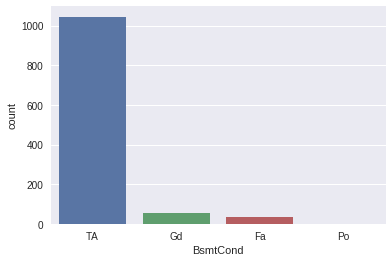

In [46]:
sns.countplot(x="BsmtCond", data=housing_train_set);

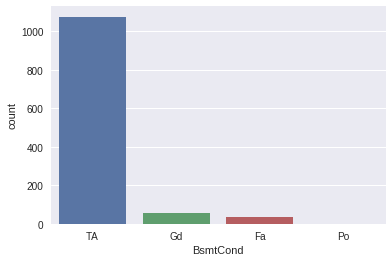

In [47]:
housing_train_set.BsmtCond.fillna('TA', inplace=True)
sns.countplot(x="BsmtCond", data=housing_train_set);

In [48]:
housing_train_set['BsmtCond'].value_counts()

TA    1075
Gd      55
Fa      36
Po       1
Name: BsmtCond, dtype: int64

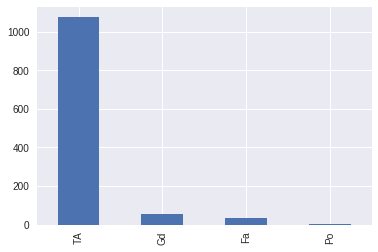

In [49]:
housing_train_set['BsmtCond'].value_counts().plot(kind='bar')

**Check if there is any relation between above features and target variable (SalePrice)**. If the relation is strong enough, then keep the featrue and impute.
* Now let us see value counts of above features. 

In [50]:
lst_cat_feature = getCatFeaturesWithNulls(housing_train_set)
for feature in lst_cat_feature:
    null_count, percent_of_nulls = getNullPercentage(housing_train_set, feature)  
    if(percent_of_nulls <= 75):
        print(housing_train_set[feature].value_counts())

None       684
BrkFace    358
Stone      106
BrkCmn      13
Name: MasVnrType, dtype: int64
TA    516
Gd    498
Ex     96
Fa     27
Name: BsmtQual, dtype: int64
No    753
Av    172
Gd    119
Mn     92
Name: BsmtExposure, dtype: int64
Unf    350
GLQ    340
ALQ    167
BLQ    118
Rec    113
LwQ     49
Name: BsmtFinType1, dtype: int64
Unf    1005
Rec      41
LwQ      37
BLQ      28
ALQ      14
GLQ      11
Name: BsmtFinType2, dtype: int64
Gd    315
TA    245
Fa     28
Ex     19
Po     17
Name: FireplaceQu, dtype: int64
Attchd     702
Detchd     295
BuiltIn     73
Basment     17
CarPort      8
2Types       4
Name: GarageType, dtype: int64
Unf    481
RFn    334
Fin    284
Name: GarageFinish, dtype: int64
TA    1046
Fa      38
Gd      11
Po       2
Ex       2
Name: GarageQual, dtype: int64
TA    1056
Fa      28
Gd       8
Po       6
Ex       1
Name: GarageCond, dtype: int64


#### From below box wisker plot, value counts -> we can conclue that when the 'MasVnrType' = None, MAsVnrArea = 0. This is the pattern we figured out from above plot and aggriation. Hence we can build method (function) to impute data based this logic

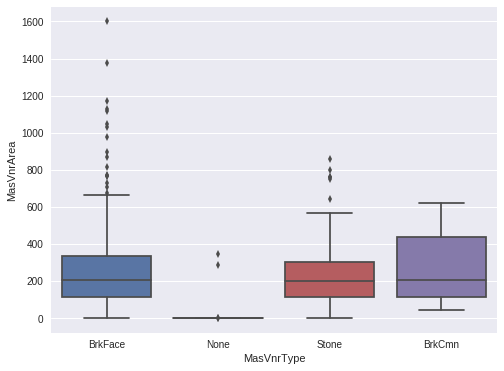

In [51]:
var = 'MasVnrType'
data = pd.concat([housing_train_set['MasVnrArea'], housing_train_set[var]], axis=1)
f, ax = plt.subplots(figsize=(8, 6))
fig = sns.boxplot(x=var, y="MasVnrArea", data=data)

In [52]:
housing_train_set['MasVnrType'].value_counts()

None       684
BrkFace    358
Stone      106
BrkCmn      13
Name: MasVnrType, dtype: int64

In [53]:
housing_train_set.describe()['MasVnrArea']

count    1167.000000
mean      106.246787
std       185.375561
min         0.000000
25%         0.000000
50%         0.000000
75%       170.000000
max      1600.000000
Name: MasVnrArea, dtype: float64

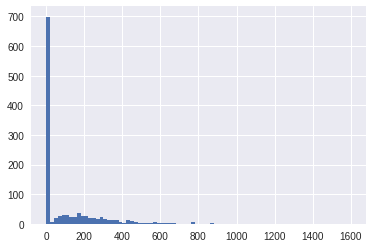

In [54]:
# have a look at MasVnrArea as Q1 - 0, Q2 - 0, Q3 - 164 and max - 1600
#housing_data['MasVnrArea'].value_counts()
# Masonry veneer area in square feet, more than 75% of the houses have zero of this. Need to check if this featrue has 
# any effect on SalePrice ?
housing_train_set.MasVnrArea.hist(bins=80)

#### Data Filtering

Shape of df_nz_vnr_area :  (479, 2)
Correlation between MasVnrArea - SalePrice 
            MasVnrArea  SalePrice
MasVnrArea    1.000000   0.437375
SalePrice     0.437375   1.000000


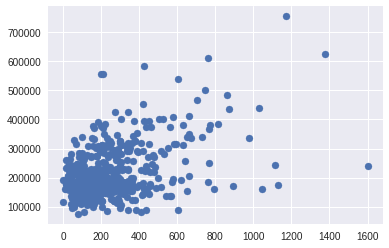

In [55]:
df_nz_vnr_area = housing_train_set[housing_train_set.MasVnrArea != 0 & housing_train_set.MasVnrArea.notnull()][['MasVnrArea','SalePrice']]
print('Shape of df_nz_vnr_area : ', df_nz_vnr_area.shape)
print('Correlation between MasVnrArea - SalePrice ')
print(df_nz_vnr_area.corr())
plt.scatter(df_nz_vnr_area.MasVnrArea,df_nz_vnr_area.SalePrice)

**Correlation between MasVnrArea - SalePrice is not significant and most of the data is zero or null**. Hence we can remove MasVnrArea, related feature MasVnrType.

In [56]:
housing_train_set.drop('MasVnrArea', axis=1, inplace=True)
housing_train_set.drop('MasVnrType', axis=1, inplace=True)

In [57]:
# I am going to drop rows with np.nan, I am doing this for training purposes. We have to handle all missing values in real-time
housing_train_set.dropna(axis=0, how='any', inplace=True)

In [58]:
lst_missing_features = getMissingDataFeatures(housing_train_set)
lst_missing_features

[]

#### Aggregate the Data
To aggregate, we typically use the “group by” function, which involves the following steps
    - Splitting the data into groups based on some criteria
    - Applying a function to each group independently
    - Combining the results into a data structure

In [59]:
# Aggregate and analyze the trend of total sale price of different HouseStyles for YearBuilt
df_house_style = pd.pivot_table(housing_train_set, values='SalePrice', index=['YearBuilt'], columns=['HouseStyle'] )
df_house_style

HouseStyle,1.5Fin,1.5Unf,1Story,2.5Fin,2.5Unf,2Story,SFoyer,SLvl
YearBuilt,,,,,,,,
1880,NaN,NaN,NaN,295000.0,NaN,265979.0,NaN,NaN
1882,NaN,NaN,NaN,NaN,NaN,168000.0,NaN,NaN
1892,NaN,NaN,NaN,475000.0,NaN,NaN,NaN,NaN
1893,NaN,NaN,NaN,NaN,325000.0,NaN,NaN,NaN
1900,160000.0,NaN,NaN,NaN,NaN,140000.0,NaN,NaN
1905,163000.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1908,240000.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1910,NaN,NaN,NaN,NaN,127950.0,NaN,NaN,NaN
1914,NaN,NaN,NaN,NaN,163000.0,NaN,NaN,NaN


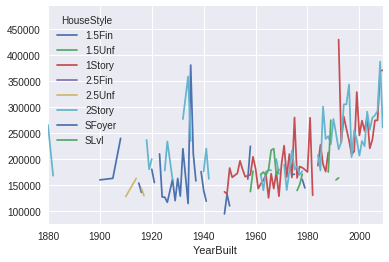

In [60]:
df_house_style.plot()

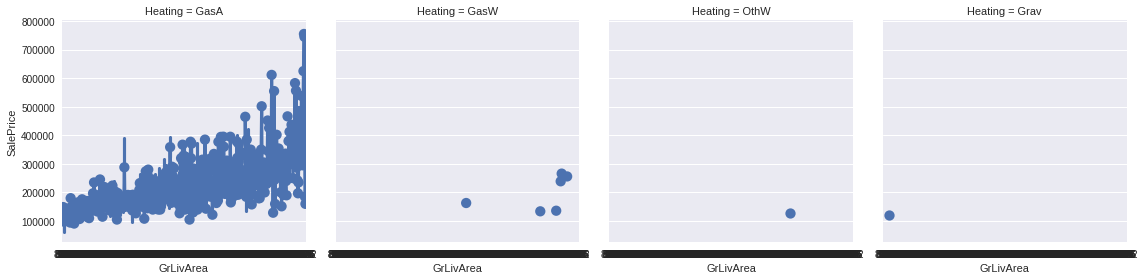

In [61]:
# Get scatter plot group by col 
sns.factorplot(data=housing_train_set, x="GrLivArea", y="SalePrice", col="Heating") # taking around 3 mins to generate

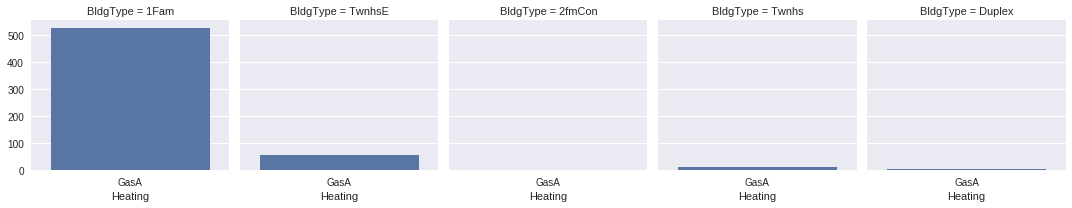

In [62]:
# Get bar chart of one categorical variable by other categorical variable.
g = sns.FacetGrid(data=housing_train_set, col="BldgType")  
g.map(sns.countplot, "Heating")  

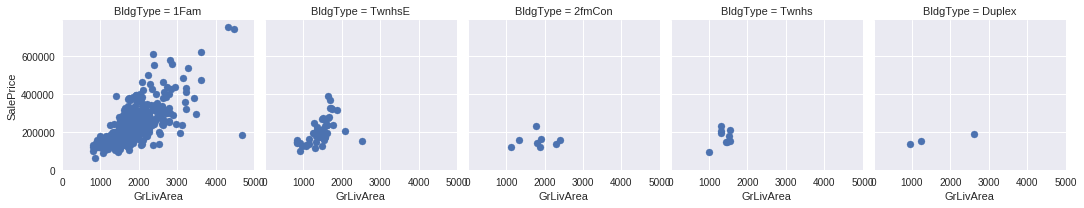

In [63]:
# Get bar chart of one categorical variable by other categorical variable.
g = sns.FacetGrid(data=housing_train_set, col="BldgType")  
g.map(plt.scatter, "GrLivArea", "SalePrice") 
g.set(xlim=(0, 5000))
g.set(ylim=(0, None))

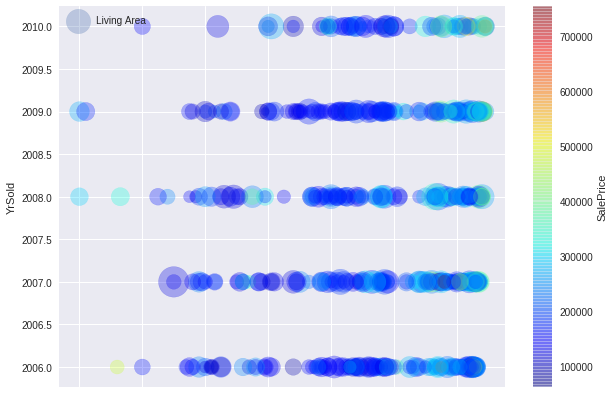

In [64]:
housing_train_set.plot(kind="scatter", x="YearBuilt", y="YrSold",
    s=housing_data['GrLivArea']/5, label="Living Area",
    c="SalePrice", cmap=plt.get_cmap("jet"),
    colorbar=True, alpha=0.3, figsize=(10,7)
)
plt.legend()
plt.show()

In [65]:
housing_train_set.YrSold.value_counts()

2006    144
2009    143
2007    141
2008    115
2010     66
Name: YrSold, dtype: int64

#### Quality of Data
    * For this dataset we can check 
    1) is YearBuilt <= YrSold ?
    2) is YearBuilt <= GarageYrBlt  ?

In [66]:
print('Is YearBuilt <= YrSold : ', len(housing_train_set) == len(housing_train_set[housing_train_set['YearBuilt'] <= housing_train_set['YrSold']]))

Is YearBuilt <= YrSold :  True


In [67]:
print('Is YearBuilt < GarageYrBlt : ', len(housing_train_set) == len(housing_train_set[housing_train_set['YearBuilt'] < housing_train_set['GarageYrBlt']]))

Is YearBuilt < GarageYrBlt :  False


In [68]:
# This records for which the Garage built before Building are not correct. 
# This might have came because of the imputation method we chose.
housing_train_set[housing_train_set['GarageYrBlt'] < housing_train_set['YearBuilt']][['GarageYrBlt', 'YearBuilt']]

,GarageYrBlt,YearBuilt
75,1900.0,1910
259,1961.0,1967
480,2003.0,2005
882,1954.0,1959


In [69]:
type(housing_train_set[housing_train_set['GarageYrBlt'] < housing_train_set['YearBuilt']].index)

pandas.indexes.numeric.Int64Index

In [70]:
# Droping inconsistent data from the data frame.
housing_train_set.drop(housing_train_set[housing_train_set['GarageYrBlt'] < housing_train_set['YearBuilt']].index, inplace=True)

## Hypothesis Testing
> Question) Are old houses sold at less price?, Is it by chance ?

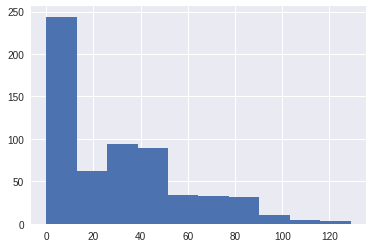

In [71]:
housing_train_set['house_age'] = housing_train_set['YrSold'] - housing_train_set['YearBuilt']

housing_train_set['house_age'].hist()

In [72]:
# Let us take the hourses older than 20 as old once.
house_age_below_20 = housing_train_set[housing_train_set.house_age <= 20]
house_age_above_20 = housing_train_set[housing_train_set.house_age > 20]

In [73]:
sale_price_below_20 = house_age_below_20['SalePrice']
sale_price_above_20 = house_age_above_20['SalePrice']
print('Mean {0}, Std {1} Sale Price of house age <= 20'.format(sale_price_below_20.mean(), sale_price_below_20.std()))
print('Mean {0}, Std {1} Sale Price of house age > 20'.format(sale_price_above_20.mean(), sale_price_above_20.std()))

Mean 267092.0337837838, Std 95544.2335838447 Sale Price of house age <= 20
Mean 177352.43689320388, Std 54327.507282522456 Sale Price of house age > 20


In [74]:
print("difference in means : ", sale_price_below_20.mean() - sale_price_above_20.mean())

difference in means :  89739.5968906


**Null Hypothesis:** The mean sale prices of new building aren't significantly different than old ones.
    - Perform **t-test** and determine the **p-value**.

In [75]:
stats.ttest_ind(sale_price_below_20, sale_price_above_20, equal_var=True)

Ttest_indResult(statistic=14.27634397840254, pvalue=4.8056789308036893e-40)

The p-value is almost zero that said, we can reject Null Hypothesis. The older the house, less the price (threshold is 20 years)

## Assumption of t-test
    * One assumption is that the data used came from a **normal distribution.**
    * There's a Shapiro-Wilk test to test for normality. 

** Shapior-Wilk Test : ** 
    * Null Hypothesis : The data tested are not from a normally distributed population
    * The test gives us 'Statistic' and the 'P-Value'. If P-Value is less than chosen alpha level (0.05) then we can   reject null hypothesis.
<font color='red'>**Note:** However, since the test is biased by sample size, the test may be statistically significant from a normal distribution in any large samples. Thus a Q–Q plot is required for verification in addition to the test.</font>

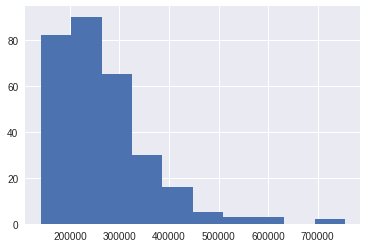

In [76]:
sale_price_below_20.hist()

In [77]:
stats.shapiro(sale_price_below_20)

(0.8526212573051453, 3.8898606380158534e-16)

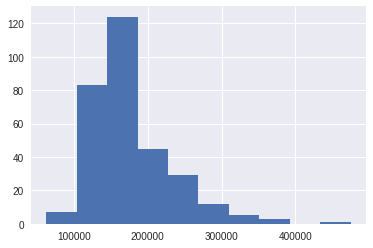

In [78]:
sale_price_above_20.hist()

In [79]:
stats.shapiro(sale_price_above_20)

(0.8875959515571594, 2.5949177905721342e-14)

Shaport-Wilk Test says that both sale_price_below_20, sale_price_above_20 are normally distrbuted as p-values are near zero. But when we look at the Q-Q polt it shows that the data is not normally distributed.

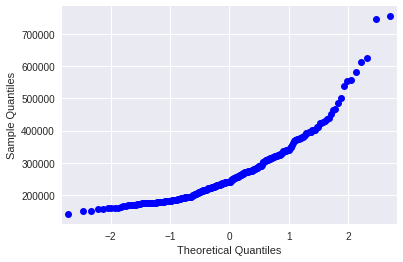

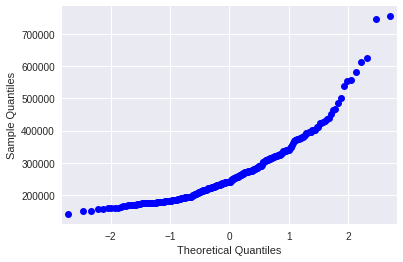

In [80]:
plt.figure(figsize=(20, 20))
qqplot(sale_price_below_20)

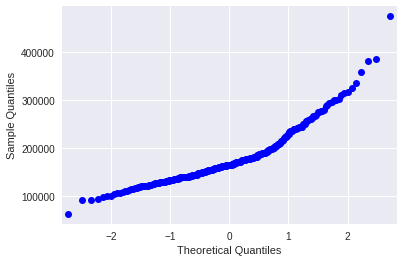

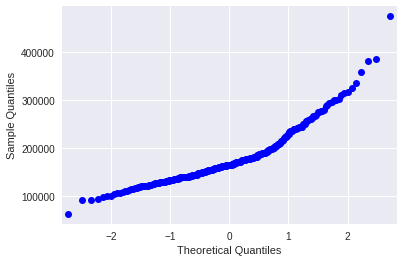

In [81]:
qqplot(sale_price_above_20)

- Linear models rely upon a lot of assumptions. If assumptions are violated, the diagnostics obtained from the model cannot be relied. 
- R-square vs adjusted R-squre : Biggest challenge is that adding any feature will increase the R-square. One way to counter this is to use adjusted R-squre.
- Take a step back and think - why do we need to report those numbers? We want some estimate of generalization. Cross-validation score provides a general framework for reporting generalization. And this will hold good across all models. And thus, multiple models can be compared. This is the machine learning approach and is widely used in practice.

### Try transform Skewed or non-normal distribution to normal by applying transformations.
    - These transformations may or may not transorm data, but there is nothing wrong in trying.

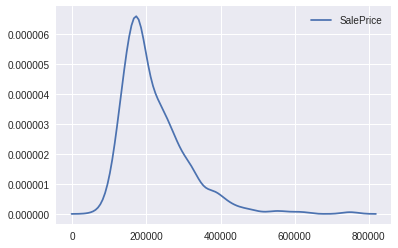

In [82]:
sns.kdeplot(housing_train_set.SalePrice)

In [83]:
stats.skew(housing_train_set.SalePrice)

1.851773732489688

In [84]:
stats.skew(np.log(housing_train_set.SalePrice))

0.4834195268249695

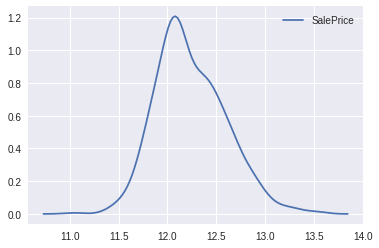

In [85]:
sns.kdeplot(np.log(housing_train_set.SalePrice))

### Conclusion:
    - Till now we have found few ways of exploring the data and gain insights.
    - We have performed some data cleanup activity, before feeding the data to Machine Learning algorthm.
    - We found some interesting correlations between featrues, especially with target variable.
    - We found some tail heavy distributions and applied transformations to make the data normally distributed.